In [1]:
#football dataset from 1916-2022

#Despite these challenges, international football remains one of the most popular and widely-followed
#sports in the world, with millions of fans and players around the globe. As the sport continues 
#to grow and evolve in the coming years, it is sure to remain a major part of the global sporting
#landscape.

In [2]:
#so many ways to score goals in football, 
#1.freekick
#2.header
#3.penalty
#4.outside the box
#among all penalty is the easiest way to score goals 
#so we'r gonna predict how many players scored penalty

# context
find wheather The football player scored a penalty kick or not

In [3]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fifa=pd.read_csv(r"C:\Users\HP\Documents\FIFA_Results.csv")
fifa.head(10)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
5,1916-07-06,Argentina,Chile,Chile,Telésforo Báez,44.0,False,False
6,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,60.0,False,True
7,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,62.0,False,True
8,1916-07-06,Argentina,Chile,Argentina,Alberto Marcovecchio,67.0,False,False
9,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,75.0,False,False


In [5]:
fifa.penalty.value_counts()

False    38323
True      2685
Name: penalty, dtype: int64

In [6]:
fifa.head(4)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False


In [7]:
fifa.tail(2)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
41006,2022-12-18,Argentina,France,Argentina,Lionel Messi,109.0,False,False
41007,2022-12-18,Argentina,France,France,Kylian Mbappé,118.0,False,True


In [8]:
fifa.describe(include="all") #statistical measures of the data

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
count,41008,41008,41008,41008,40959,40750.000000,41008,41008
unique,4323,220,220,220,13376,NaN,2,2
top,2011-10-11,Brazil,Uruguay,Brazil,Cristiano Ronaldo,NaN,False,False
freq,145,1021,774,1046,91,NaN,40290,38323
mean,NaN,NaN,NaN,NaN,NaN,50.019166,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,26.360859,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,28.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,51.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,73.000000,NaN,NaN


In [9]:
fifa.shape

(41008, 8)

In [10]:
#drop
Date_1=fifa["date"]
#Date_1

In [11]:
fifa=fifa.drop(["date"],axis=1)
fifa

,home_team,away_team,team,scorer,minute,own_goal,penalty
0,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...
41003,Argentina,France,Argentina,Ángel Di María,36.0,False,False
41004,Argentina,France,France,Kylian Mbappé,80.0,False,True
41005,Argentina,France,France,Kylian Mbappé,81.0,False,False
41006,Argentina,France,Argentina,Lionel Messi,109.0,False,False


# Cleaning process

In [12]:
fifa.isnull().sum()

home_team      0
away_team      0
team           0
scorer        49
minute       258
own_goal       0
penalty        0
dtype: int64

In [13]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41008 entries, 0 to 41007
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   home_team  41008 non-null  object 
 1   away_team  41008 non-null  object 
 2   team       41008 non-null  object 
 3   scorer     40959 non-null  object 
 4   minute     40750 non-null  float64
 5   own_goal   41008 non-null  bool   
 6   penalty    41008 non-null  bool   
dtypes: bool(2), float64(1), object(4)
memory usage: 1.6+ MB


In [14]:
fifa.scorer.value_counts()

Cristiano Ronaldo      91
Robert Lewandowski     56
Lionel Messi           54
Ali Daei               49
Miroslav Klose         48
                       ..
Hugo Galeano            1
David Kelly             1
Fernando Ochoaizpur     1
Néstor Gorosito         1
Achraf Dari             1
Name: scorer, Length: 13376, dtype: int64

In [15]:
fifa.minute.value_counts()

90.0     1593
45.0      831
89.0      642
75.0      570
85.0      569
         ... 
96.0        4
107.0       4
113.0       3
99.0        2
122.0       1
Name: minute, Length: 121, dtype: int64

In [16]:
fifa=fifa.dropna()

In [17]:
fifa.isnull().sum()

home_team    0
away_team    0
team         0
scorer       0
minute       0
own_goal     0
penalty      0
dtype: int64

In [18]:
fifa.shape

(40750, 7)

# Data-type conversion

In [19]:
fifa.dtypes

home_team     object
away_team     object
team          object
scorer        object
minute       float64
own_goal        bool
penalty         bool
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
fifa.scorer=le.fit_transform(fifa.scorer)
fifa.home_team=le.fit_transform(fifa.home_team)
fifa.away_team=le.fit_transform(fifa.away_team)
fifa.team=le.fit_transform(fifa.team)
fifa.own_goal=le.fit_transform(fifa.own_goal)
fifa.penalty=le.fit_transform(fifa.penalty)

In [22]:
fifa.dtypes

home_team      int32
away_team      int32
team           int32
scorer         int32
minute       float64
own_goal       int64
penalty        int64
dtype: object

In [23]:
fifa.own_goal.value_counts()

0    40032
1      718
Name: own_goal, dtype: int64

<Axes: >

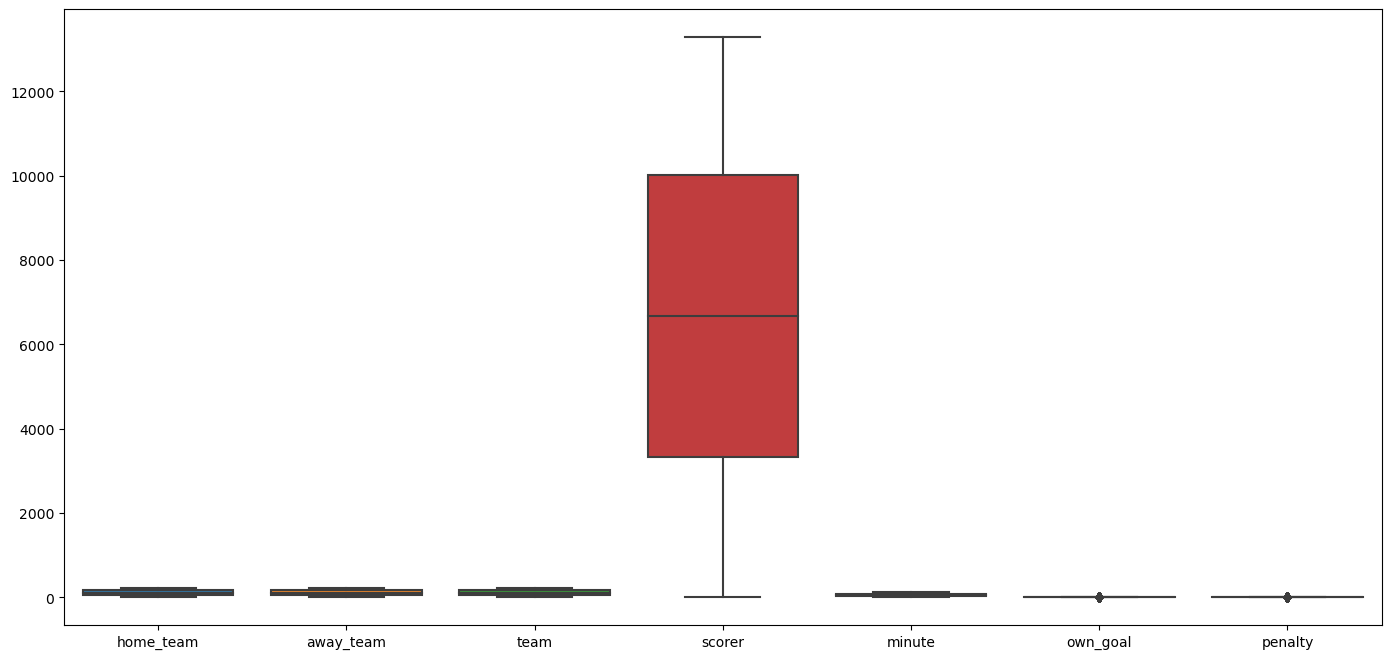

In [24]:
fig=plt.figure(figsize=(17,8))
sns.boxplot(data=fifa)

In [25]:
fifa.skew()

home_team    0.071280
away_team   -0.009411
team         0.028810
scorer       0.008981
minute      -0.099492
own_goal     7.333265
penalty      3.501372
dtype: float64

# Base Mode 1

# Model fitting

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [27]:
x=fifa.iloc[:,0:-1]
y=fifa.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)  

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((32600, 6), (8150, 6), (32600,), (8150,))

# LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression 
lg=LogisticRegression()

In [32]:
lg.fit(x_train,y_train)

LogisticRegression()

In [33]:
p1=lg.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix
cf1=confusion_matrix(y_test,p1)
cf1

array([[7641,    0],
       [ 509,    0]], dtype=int64)

In [35]:
ac1=cf1.diagonal().sum()/cf1.sum()*100
ac1

93.75460122699386

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,p1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7641
           1       0.00      0.00      0.00       509

    accuracy                           0.94      8150
   macro avg       0.47      0.50      0.48      8150
weighted avg       0.88      0.94      0.91      8150



In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
Lg_p1=precision_score(y_test,p1)
Lg_r1=recall_score(y_test,p1)
Lg_f1=f1_score(y_test,p1)
print(Lg_p1,Lg_r1,Lg_f1)

0.0 0.0 0.0


# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [40]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
rf_p=rf.predict(x_test)

In [42]:
rf_c=confusion_matrix(y_test,rf_p)
rf_c

array([[7624,   17],
       [ 504,    5]], dtype=int64)

In [43]:
rf_ac=rf_c.diagonal().sum()/rf_c.sum()*100
rf_ac

93.60736196319019

In [44]:
print(classification_report(y_test,rf_p))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7641
           1       0.23      0.01      0.02       509

    accuracy                           0.94      8150
   macro avg       0.58      0.50      0.49      8150
weighted avg       0.89      0.94      0.91      8150



In [45]:
rf_f1=f1_score(y_test,rf_p)
rf_p1=precision_score(y_test,rf_p)
rf_r1=recall_score(y_test,rf_p)
print(rf_f1,rf_p1,rf_r1)

0.018832391713747648 0.22727272727272727 0.009823182711198428


# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [47]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
dt_p=dt.predict(x_test)
dt_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
dt_c=confusion_matrix(y_test,dt_p)   #actual and predict
dt_c                                 #tn is less

array([[7075,  566],
       [ 451,   58]], dtype=int64)

In [50]:
dt_ac=dt_c.diagonal().sum()/dt_c.sum()*100
dt_ac

87.52147239263803

In [51]:
print(classification_report(y_test,dt_p))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7641
           1       0.09      0.11      0.10       509

    accuracy                           0.88      8150
   macro avg       0.52      0.52      0.52      8150
weighted avg       0.89      0.88      0.88      8150



In [52]:
dt_f1=f1_score(y_test,dt_p)
dt_p1=precision_score(y_test,dt_p)
dt_r1=recall_score(y_test,dt_p)
print(dt_f1,dt_p1,dt_r1)

0.10238305383936452 0.09294871794871795 0.11394891944990176


# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [54]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
knn_p=knn.predict(x_test)

In [56]:
knn_c1=confusion_matrix(y_test,knn_p)
knn_c1

array([[7594,   47],
       [ 505,    4]], dtype=int64)

In [57]:
knn_ac1=knn_c1.diagonal().sum()/knn_c1.sum()*100
knn_ac1

93.22699386503068

In [58]:
print(classification_report(y_test,knn_p))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7641
           1       0.08      0.01      0.01       509

    accuracy                           0.93      8150
   macro avg       0.51      0.50      0.49      8150
weighted avg       0.88      0.93      0.91      8150



In [59]:
knn_f1=f1_score(y_test,knn_p)
knn_p1=precision_score(y_test,knn_p)
knn_r1=recall_score(y_test,knn_p)
print(knn_f1,knn_p1,knn_r1)

0.014285714285714285 0.0784313725490196 0.007858546168958742


# Adaptive Boosting

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [61]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [62]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [63]:
adbo_p=adbo.predict(x_test)

In [64]:
adbo_cf=confusion_matrix(y_test,adbo_p)
adbo_cf

array([[7133,  508],
       [ 441,   68]], dtype=int64)

In [65]:
adbo_ac1=adbo_cf.diagonal().sum()/adbo_cf.sum()*100
adbo_ac1

88.3558282208589

In [66]:
print(classification_report(y_test,adbo_p))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7641
           1       0.12      0.13      0.13       509

    accuracy                           0.88      8150
   macro avg       0.53      0.53      0.53      8150
weighted avg       0.89      0.88      0.89      8150



In [67]:
adbo_f1=f1_score(y_test,adbo_p)
adbo_p1=precision_score(y_test,adbo_p)
adbo_r1=recall_score(y_test,adbo_p)
print(adbo_f1,adbo_p1,adbo_r1)

0.12534562211981568 0.11805555555555555 0.13359528487229863


# XGB(XGBOOST)

In [68]:
import xgboost

In [69]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [70]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [71]:
xgb_p=xgb.predict(x_test)

In [72]:
xgb_cf=confusion_matrix(y_test,xgb_p)
xgb_cf

array([[7634,    7],
       [ 508,    1]], dtype=int64)

In [73]:
xgb_ac=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_ac

93.68098159509202

In [74]:
print(classification_report(y_test,xgb_p))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7641
           1       0.12      0.00      0.00       509

    accuracy                           0.94      8150
   macro avg       0.53      0.50      0.49      8150
weighted avg       0.89      0.94      0.91      8150



In [75]:
xgb_f1=f1_score(y_test,xgb_p)
xgb_p1=precision_score(y_test,xgb_p)
xgb_r1=recall_score(y_test,xgb_p)
print(xgb_f1,xgb_p1,xgb_r1)

0.003868471953578336 0.125 0.0019646365422396855


# SVM(support vector machine)

In [76]:
from sklearn.svm import SVC
svm=SVC()

In [77]:
svm.fit(x_train,y_train)

SVC()

In [78]:
sv_p=svm.predict(x_test)

In [79]:
sv_cf=confusion_matrix(y_test,sv_p)
sv_cf

array([[7641,    0],
       [ 509,    0]], dtype=int64)

In [80]:
sv_acc1=sv_cf.diagonal().sum()/sv_cf.sum()*100
sv_acc1

93.75460122699386

In [81]:
print(classification_report(y_test,sv_p))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7641
           1       0.00      0.00      0.00       509

    accuracy                           0.94      8150
   macro avg       0.47      0.50      0.48      8150
weighted avg       0.88      0.94      0.91      8150



In [82]:
sv_f1=f1_score(y_test,sv_p)
sv_p1=precision_score(y_test,sv_p)
sv_r1=recall_score(y_test,sv_p)
print(sv_f1,sv_p1,sv_r1)

0.0 0.0 0.0


# Navie Bayes

In [83]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [84]:
nb.fit(x_train,y_train)

MultinomialNB()

In [85]:
nb_p=nb.predict(x_test)
nb_p

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [86]:
nb_cf=confusion_matrix(y_test,nb_p)
nb_cf

array([[5954, 1687],
       [ 378,  131]], dtype=int64)

In [87]:
nb_acc=nb_cf.diagonal().sum()/nb_cf.sum()*100
nb_acc

74.66257668711657

In [88]:
print(classification_report(y_test,nb_p))   #actual , predict

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      7641
           1       0.07      0.26      0.11       509

    accuracy                           0.75      8150
   macro avg       0.51      0.52      0.48      8150
weighted avg       0.89      0.75      0.81      8150



In [89]:
nb_f1=f1_score(y_test,nb_p)
nb_p1=precision_score(y_test,nb_p)
nb_r1=recall_score(y_test,nb_p)
print(nb_f1,nb_p1,nb_r1)

0.11259131929522992 0.07205720572057206 0.25736738703339884


In [90]:
D1=["Logistic","RF","DT","KNN","ADB","XGB","SVM","NB"]
D2=[ac1,rf_ac,dt_ac,knn_ac1,adbo_ac1,xgb_ac,sv_acc1,nb_acc]
D3=[Lg_p1,rf_p1,dt_p1,knn_p1,adbo_p1,xgb_p1,sv_p1,nb_p1]
D4=[Lg_r1,rf_r1,dt_r1,knn_r1,adbo_r1,xgb_r1,sv_r1,nb_r1]
D5=[Lg_f1,rf_f1,dt_f1,knn_f1,adbo_f1,xgb_f1,sv_f1,nb_f1]

In [91]:
final_df=pd.DataFrame({"Model":D1,"Accuracy":D2,"Precision":D3,"recall":D4,"f1_score":D5})
final_df

,Model,Accuracy,Precision,recall,f1_score
0,Logistic,93.754601,0.000000,0.000000,0.000000
1,RF,93.607362,0.227273,0.009823,0.018832
2,DT,87.521472,0.092949,0.113949,0.102383
3,KNN,93.226994,0.078431,0.007859,0.014286
4,ADB,88.355828,0.118056,0.133595,0.125346
5,XGB,93.680982,0.125000,0.001965,0.003868
6,SVM,93.754601,0.000000,0.000000,0.000000
7,NB,74.662577,0.072057,0.257367,0.112591


In [92]:
#Conclusion : all model giving bad results , compare to others rf is good

# CLASS IMALANCE TREATMENT

Text(0.5, 1.0, 'Penalty')

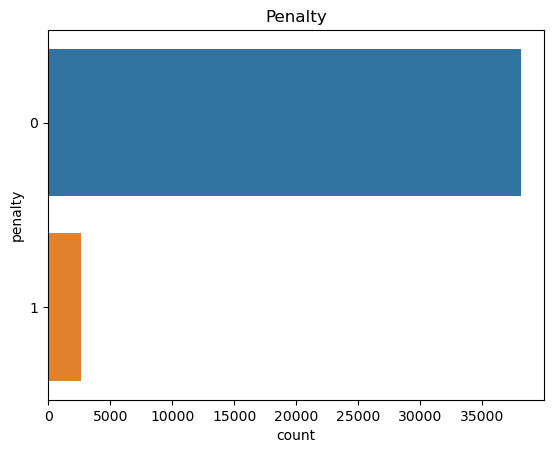

In [93]:
sns.countplot(data=fifa,y="penalty")
plt.title("Penalty")

# OVERSAMPLING

# Random Oversampling

In [94]:
#fifa.shape

In [95]:
fifa.penalty.value_counts()

0    38067
1     2683
Name: penalty, dtype: int64

In [96]:
cl_0,cl_1=fifa["penalty"].value_counts()
cl_0,cl_1

(38067, 2683)

In [97]:
train_0=fifa[fifa["penalty"]==0]
train_1=fifa[fifa["penalty"]==1]
train_0.shape,train_1.shape

((38067, 7), (2683, 7))

In [98]:
#class_1over=train_1.sample(cl_0,replace=True)

In [99]:
#class_1over.head()
#class_1over.shape,train_0.shape

In [100]:
#fifa2=pd.concat([class_1over,train_0],axis=0)
#fifa2.shape

In [101]:
#fifa2.penalty.value_counts()

# SMOTE -SYNTHETIC MINORITY OVERSAMPLIG TECHNIQES

In [102]:
x6=fifa.iloc[:,0:-1]
y6=fifa.iloc[:,-1]

In [103]:
y6.value_counts()

0    38067
1     2683
Name: penalty, dtype: int64

In [104]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [105]:
x_smote,y_smote=smote.fit_resample(x6,y6)

In [106]:
x_smote.shape,y_smote.shape

((76134, 6), (76134,))

In [107]:
fifa2=pd.concat([x_smote,y_smote],axis=1)
#fifa2.shape

# MODEL 2

In [108]:
x1=fifa2.iloc[:,0:-1]
y1=fifa2.iloc[:,-1]

In [109]:
x1_tr,x1_te,y1_tr,y1_te=train_test_split(x1,y1,test_size=0.2,random_state=100)
x1_tr.shape,x1_te.shape,y1_tr.shape,y1_te.shape

((60907, 6), (15227, 6), (60907,), (15227,))

In [110]:
#fifa2=pd.concat([x1,y1],axis=1)
#fifa2.shape

# Logistic Regression

In [111]:
lg.fit(x1_tr,y1_tr)

LogisticRegression()

In [112]:
Lop=lg.predict(x1_te)

In [113]:
Locf=confusion_matrix(y1_te,Lop)
Locf

array([[4012, 3551],
       [3720, 3944]], dtype=int64)

In [114]:
Loacc=Locf.diagonal().sum()/Locf.sum()*100
Loacc

52.24929401720628

In [115]:
print(classification_report(y1_te,Lop))

              precision    recall  f1-score   support

           0       0.52      0.53      0.52      7563
           1       0.53      0.51      0.52      7664

    accuracy                           0.52     15227
   macro avg       0.52      0.52      0.52     15227
weighted avg       0.52      0.52      0.52     15227



In [116]:
Lg_of1=f1_score(y1_te,Lop)
Lg_op1=precision_score(y1_te,Lop)
Lg_or1=recall_score(y1_te,Lop)
print(Lg_of1,Lg_op1,Lg_or1)

0.5203509466323636 0.5262174783188792 0.5146137787056367


# Random Forest

In [117]:
rf.fit(x1_tr,y1_tr)

RandomForestClassifier()

In [118]:
c_p1=rf.predict(x1_te)

Text(0.5, 1.0, 'Confusion Matrix')

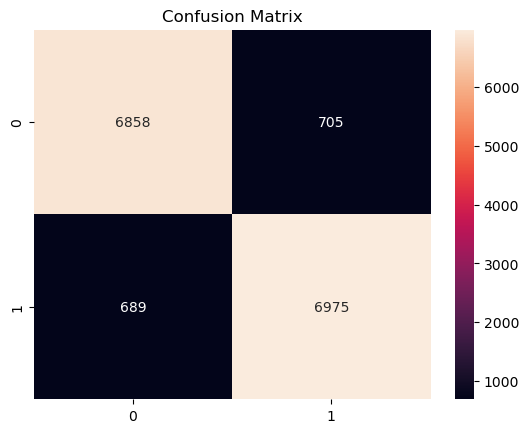

In [119]:
c_cf1=confusion_matrix(y1_te,c_p1)
sns.heatmap(c_cf1,annot=True,fmt='d')
plt.title('Confusion Matrix')

In [120]:
c_ac1=c_cf1.diagonal().sum()/c_cf1.sum()*100
c_ac1

90.8452091679254

In [121]:
print(classification_report(y1_te,c_p1))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7563
           1       0.91      0.91      0.91      7664

    accuracy                           0.91     15227
   macro avg       0.91      0.91      0.91     15227
weighted avg       0.91      0.91      0.91     15227



In [122]:
rf_of1=f1_score(y1_te,c_p1)
rf_op1=precision_score(y1_te,c_p1)
rf_or1=recall_score(y1_te,c_p1)
print(rf_of1,rf_op1,rf_or1)

0.9091501564129302 0.908203125 0.9100991649269311


# Decision Tree

In [123]:
dt.fit(x1_tr,y1_tr)

DecisionTreeClassifier()

In [124]:
dt_op=dt.predict(x1_te)

In [125]:
dt_ocf=confusion_matrix(y1_te,dt_op)
dt_ocf

array([[6904,  659],
       [ 561, 7103]], dtype=int64)

In [126]:
dt_oacc=dt_ocf.diagonal().sum()/dt_ocf.sum()*100
dt_oacc

91.98791620148421

In [127]:
print(classification_report(y1_te,dt_op))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      7563
           1       0.92      0.93      0.92      7664

    accuracy                           0.92     15227
   macro avg       0.92      0.92      0.92     15227
weighted avg       0.92      0.92      0.92     15227



In [128]:
dt_of1=f1_score(y1_te,dt_op)
dt_op1=precision_score(y1_te,dt_op)
dt_or1=recall_score(y1_te,dt_op)
print(dt_of1,dt_op1,dt_or1)

0.920912744716712 0.9150992012367947 0.9268006263048016


# KNN

In [129]:
knn.fit(x1_tr,y1_tr)

KNeighborsClassifier()

In [130]:
kn_op=knn.predict(x1_te)

In [131]:
kn_ocf=confusion_matrix(y1_te,kn_op)
kn_ocf

array([[5540, 2023],
       [ 226, 7438]], dtype=int64)

In [132]:
kn_oacc=kn_ocf.diagonal().sum()/kn_ocf.sum()*100
kn_oacc

85.23018322716229

In [133]:
print(classification_report(y1_te,kn_op))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83      7563
           1       0.79      0.97      0.87      7664

    accuracy                           0.85     15227
   macro avg       0.87      0.85      0.85     15227
weighted avg       0.87      0.85      0.85     15227



In [134]:
knn_of1=f1_score(y1_te,kn_op)
knn_op1=precision_score(y1_te,kn_op)
knn_or1=recall_score(y1_te,kn_op)
print(knn_of1,knn_op1,knn_or1)

0.8686715328467154 0.786174822957404 0.9705114822546973


# XGB(XGBOOST)

In [135]:
xgb.fit(x1_tr,y1_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [136]:
xgb_op=xgb.predict(x1_te)

In [137]:
xgb_ocf=confusion_matrix(y1_te,xgb_op)
xgb_ocf

array([[7512,   51],
       [ 612, 7052]], dtype=int64)

In [138]:
xgb_oacc=xgb_ocf.diagonal().sum()/xgb_ocf.sum()*100
xgb_oacc

95.64589216523281

In [139]:
print(classification_report(y1_te,xgb_op))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7563
           1       0.99      0.92      0.96      7664

    accuracy                           0.96     15227
   macro avg       0.96      0.96      0.96     15227
weighted avg       0.96      0.96      0.96     15227



In [140]:
xgb_of1=f1_score(y1_te,xgb_op)
xgb_op1=precision_score(y1_te,xgb_op)
xgb_or1=recall_score(y1_te,xgb_op)
print(xgb_of1,xgb_op1,xgb_or1)

0.9551025936209115 0.9928199352386315 0.9201461377870563


# Navie Bayes

In [141]:
nb.fit(x1_tr,y1_tr)

MultinomialNB()

In [142]:
nb_op=nb.predict(x1_te)

In [143]:
nb_cf=confusion_matrix(y1_te,nb_op)
nb_cf

array([[3843, 3720],
       [3682, 3982]], dtype=int64)

In [144]:
nb_oac=nb_cf.diagonal().sum()/nb_cf.sum()*100
nb_oac

51.38898010113614

In [145]:
print(classification_report(y1_te,nb_op))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51      7563
           1       0.52      0.52      0.52      7664

    accuracy                           0.51     15227
   macro avg       0.51      0.51      0.51     15227
weighted avg       0.51      0.51      0.51     15227



In [146]:
nb_of1=f1_score(y1_te,nb_op)
nb_op1=precision_score(y1_te,nb_op)
nb_or1=recall_score(y1_te,nb_op)
print(nb_of1,nb_op1,nb_or1)

0.5182871274241831 0.5170085692028045 0.519572025052192


In [147]:
O1=["Logistic","RF","DT","KNN","XGB","NB"]
O2=[Loacc,c_ac1,dt_oacc,kn_oacc,xgb_oacc,nb_oac]
O3=[Lg_op1,rf_op1,dt_op1,knn_op1,xgb_op1,nb_op1]
O4=[Lg_or1,rf_or1,dt_or1,knn_or1,xgb_or1,nb_or1]
O5=[Lg_of1,rf_of1,dt_of1,knn_of1,xgb_of1,nb_of1]

In [148]:
final_df1=pd.DataFrame({"Model":O1,"Accuracy":O2,"Precision":O3,"recall":O4,"f1_score":O5})
final_df1

,Model,Accuracy,Precision,recall,f1_score
0,Logistic,52.249294,0.526217,0.514614,0.520351
1,RF,90.845209,0.908203,0.910099,0.909150
2,DT,91.987916,0.915099,0.926801,0.920913
3,KNN,85.230183,0.786175,0.970511,0.868672
4,XGB,95.645892,0.992820,0.920146,0.955103
5,NB,51.388980,0.517009,0.519572,0.518287


In [149]:
#conclusion : RF and DT giving high acc,f1-score but RF has less TN compared to dt

# UNDERSAMPLING

# Random under

In [150]:
#cl_0,cl_1

In [151]:
#train_True.head(2)

In [152]:
#class_0under=train_0.sample(cl_1)

In [153]:
#class_0under.shape,train_1.shape

In [154]:
#fifa3=pd.concat([class_0under,train_1],axis=0)
#fifa3.head()
#fifa3.shape

In [155]:
#fifa3.penalty.value_counts()

# IMBLEARN-Undersampling

In [156]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

In [157]:
imu_x=fifa.iloc[:,0:-1]
imu_y=fifa.iloc[:,-1]

In [158]:
a1=RandomUnderSampler(sampling_strategy="all")

In [159]:
x3,y3=a1.fit_resample(imu_x,imu_y)
x3.shape,y3.shape

((5366, 6), (5366,))

In [160]:
fifa3=pd.concat([x3,y3],axis=1)
fifa3.shape

(5366, 7)

# Spliting

In [161]:
x2=fifa3.iloc[:,0:-1]
y2=fifa3.iloc[:,-1]

In [162]:
from sklearn.model_selection import train_test_split
x2_tr,x2_te,y2_tr,y2_te=train_test_split(x2,y2,test_size=0.2,random_state=100)

In [163]:
x2_tr.shape,x2_te.shape,y2_tr.shape,y2_te.shape

((4292, 6), (1074, 6), (4292,), (1074,))

In [164]:
#fifa3=pd.concat([x2,y2],axis=1)
#fifa3

# LOGISTIC REGRESSION

In [165]:
lg.fit(x2_tr,y2_tr)

LogisticRegression()

In [166]:
Lu_p=lg.predict(x2_te)

In [167]:
Lu_cf=confusion_matrix(y2_te,Lu_p) 
Lu_cf

array([[254, 302],
       [213, 305]], dtype=int64)

In [168]:
Lu_ac=Lu_cf.diagonal().sum()/Lu_cf.sum()*100
Lu_ac

52.04841713221602

In [169]:
print(classification_report(y2_te,Lu_p))

              precision    recall  f1-score   support

           0       0.54      0.46      0.50       556
           1       0.50      0.59      0.54       518

    accuracy                           0.52      1074
   macro avg       0.52      0.52      0.52      1074
weighted avg       0.52      0.52      0.52      1074



In [170]:
Lg_uf1=f1_score(y2_te,Lu_p)
Lg_up1=precision_score(y2_te,Lu_p)
Lg_ur1=recall_score(y2_te,Lu_p)
print(Lg_uf1,Lg_up1,Lg_ur1)

0.5422222222222222 0.5024711696869851 0.5888030888030888


# Random Forest

In [171]:
rf.fit(x2_tr,y2_tr)

RandomForestClassifier()

In [172]:
Ru_p=rf.predict(x2_te)

In [173]:
Ru_cf=confusion_matrix(y2_te,Ru_p)
Ru_cf

array([[284, 272],
       [211, 307]], dtype=int64)

In [174]:
Ru_acc=Ru_cf.diagonal().sum()/Ru_cf.sum()*100
Ru_acc

55.02793296089386

In [175]:
print(classification_report(y2_te,Ru_p))

              precision    recall  f1-score   support

           0       0.57      0.51      0.54       556
           1       0.53      0.59      0.56       518

    accuracy                           0.55      1074
   macro avg       0.55      0.55      0.55      1074
weighted avg       0.55      0.55      0.55      1074



In [176]:
rf_uf1=f1_score(y2_te,Ru_p)
rf_up1=precision_score(y2_te,Ru_p)
rf_ur1=recall_score(y2_te,Ru_p)
print(rf_uf1,rf_up1,rf_ur1)

0.5597082953509572 0.5302245250431779 0.5926640926640927


# Decision Tree

In [177]:
dt.fit(x2_tr,y2_tr)

DecisionTreeClassifier()

In [178]:
dt_up=dt.predict(x2_te)

In [179]:
dt_ucf=confusion_matrix(y2_te,dt_up)
dt_ucf

array([[290, 266],
       [235, 283]], dtype=int64)

In [180]:
dt_uacc=dt_ucf.diagonal().sum()/dt_ucf.sum()*100
dt_uacc

53.351955307262564

In [181]:
print(classification_report(y2_te,dt_up))

              precision    recall  f1-score   support

           0       0.55      0.52      0.54       556
           1       0.52      0.55      0.53       518

    accuracy                           0.53      1074
   macro avg       0.53      0.53      0.53      1074
weighted avg       0.53      0.53      0.53      1074



In [182]:
dt_uf1=f1_score(y2_te,dt_up)
dt_up1=precision_score(y2_te,dt_up)
dt_ur1=recall_score(y2_te,dt_up)
print(dt_uf1,dt_up1,dt_ur1)

0.5304592314901594 0.5154826958105647 0.5463320463320464


# knn

In [183]:
knn.fit(x2_tr,y2_tr)

KNeighborsClassifier()

In [184]:
kn_up=knn.predict(x2_te)

In [185]:
kn_ucf=confusion_matrix(y2_te,kn_up)
kn_ucf

array([[264, 292],
       [241, 277]], dtype=int64)

In [186]:
kn_uacc=kn_ucf.diagonal().sum()/kn_ucf.sum()*100
kn_uacc

50.37243947858473

In [187]:
print(classification_report(y2_te,kn_up))

              precision    recall  f1-score   support

           0       0.52      0.47      0.50       556
           1       0.49      0.53      0.51       518

    accuracy                           0.50      1074
   macro avg       0.50      0.50      0.50      1074
weighted avg       0.51      0.50      0.50      1074



In [188]:
knn_uf1=f1_score(y2_te,kn_up)
knn_up1=precision_score(y2_te,kn_up)
knn_ur1=recall_score(y2_te,kn_up)
print(knn_uf1,knn_up1,knn_ur1)

0.5096596136154554 0.4868189806678383 0.5347490347490348


# XGB

In [189]:
xgb.fit(x2_tr,y2_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [190]:
xgb_up=xgb.predict(x2_te)

In [191]:
xgb_ucf=confusion_matrix(y2_te,xgb_up)
xgb_ucf

array([[292, 264],
       [236, 282]], dtype=int64)

In [192]:
xgb_uacc=xgb_ucf.diagonal().sum()/xgb_ucf.sum()*100
xgb_uacc

53.445065176908756

In [193]:
print(classification_report(y2_te,xgb_up))

              precision    recall  f1-score   support

           0       0.55      0.53      0.54       556
           1       0.52      0.54      0.53       518

    accuracy                           0.53      1074
   macro avg       0.53      0.53      0.53      1074
weighted avg       0.54      0.53      0.53      1074



In [194]:
xgb_uf1=f1_score(y2_te,xgb_up)
xgb_up1=precision_score(y2_te,xgb_up)
xgb_ur1=recall_score(y2_te,xgb_up)
print(xgb_uf1,xgb_up1,xgb_ur1)

0.5300751879699249 0.5164835164835165 0.5444015444015444


# Navie Bayes

In [195]:
nb.fit(x2_tr,y2_tr)

MultinomialNB()

In [196]:
nb_up=nb.predict(x2_te)

In [197]:
nb_ucf=confusion_matrix(y2_te,nb_up)
nb_ucf

array([[276, 280],
       [236, 282]], dtype=int64)

In [198]:
nb_uac=nb_ucf.diagonal().sum()/nb_ucf.sum()*100
nb_uac

51.955307262569825

In [199]:
print(classification_report(y2_te,nb_up))

              precision    recall  f1-score   support

           0       0.54      0.50      0.52       556
           1       0.50      0.54      0.52       518

    accuracy                           0.52      1074
   macro avg       0.52      0.52      0.52      1074
weighted avg       0.52      0.52      0.52      1074



In [200]:
nb_uf1=f1_score(y2_te,nb_up)
nb_up1=precision_score(y2_te,nb_up)
nb_ur1=recall_score(y2_te,nb_up)
print(nb_uf1,nb_up1,nb_ur1)

0.5222222222222223 0.501779359430605 0.5444015444015444


In [201]:
U1=["Logistic","RF","DT","KNN","XGB","NB"]
U2=[Lu_ac,Ru_acc,dt_uacc,kn_uacc,xgb_uacc,nb_uac]
U3=[Lg_up1,rf_up1,dt_up1,knn_up1,xgb_up1,nb_up1]
U4=[Lg_ur1,rf_ur1,dt_ur1,knn_ur1,xgb_ur1,nb_ur1]
U5=[Lg_uf1,rf_uf1,dt_uf1,knn_uf1,xgb_uf1,nb_uf1]

In [202]:
final_df2=pd.DataFrame({"Model":U1,"Accuracy":U2,"Precision":U3,"recall":U4,"f1_score":U5})
final_df2

,Model,Accuracy,Precision,recall,f1_score
0,Logistic,52.048417,0.502471,0.588803,0.542222
1,RF,55.027933,0.530225,0.592664,0.559708
2,DT,53.351955,0.515483,0.546332,0.530459
3,KNN,50.372439,0.486819,0.534749,0.509660
4,XGB,53.445065,0.516484,0.544402,0.530075
5,NB,51.955307,0.501779,0.544402,0.522222


# CONCLUSION

In [203]:
#undersampling: givies low acc and low f1-score

#Smote over : knn is good acc , tn is high
#             dt is high acc , high tn 
#             rf is high acc, tn is high
#            between dt, rf and knn compared to rf tn is low

# Visulaization

In [204]:
fifa.dtypes

home_team      int32
away_team      int32
team           int32
scorer         int32
minute       float64
own_goal       int64
penalty        int64
dtype: object

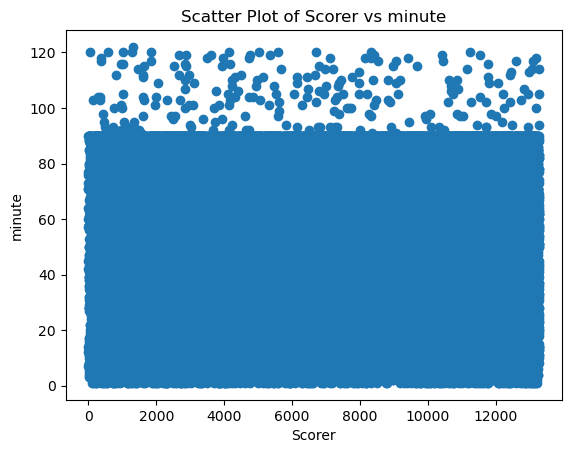

In [205]:
#scatter plot
scorer = fifa['scorer']
penalty = fifa['minute']

plt.scatter(scorer, penalty)
plt.xlabel('Scorer')
plt.ylabel('minute')
plt.title('Scatter Plot of Scorer vs minute')
plt.show()

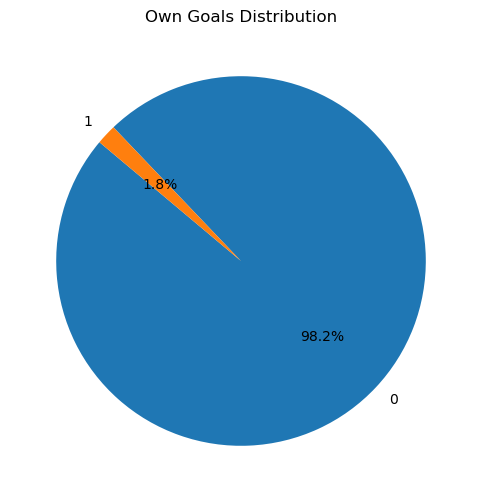

In [206]:
own_goal_counts = fifa['own_goal'].value_counts()

#pie chart
plt.figure(figsize=(6, 6))
plt.pie(own_goal_counts, labels=own_goal_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Own Goals Distribution')
plt.show()

In [207]:
fifa_n=fifa.corr()
fifa_n

,home_team,away_team,team,scorer,minute,own_goal,penalty
home_team,1.000000,-0.013591,0.597073,-0.015427,0.005382,-0.004671,-0.010963
away_team,-0.013591,1.000000,0.391667,0.000557,0.010032,0.009923,-0.014154
team,0.597073,0.391667,1.000000,-0.020349,0.001823,-0.000364,-0.009614
scorer,-0.015427,0.000557,-0.020349,1.000000,0.001621,-0.000322,-0.003546
minute,0.005382,0.010032,0.001823,0.001621,1.000000,-0.003430,0.016976
own_goal,-0.004671,0.009923,-0.000364,-0.000322,-0.003430,1.000000,-0.035555
penalty,-0.010963,-0.014154,-0.009614,-0.003546,0.016976,-0.035555,1.000000


In [208]:
import seaborn as sns

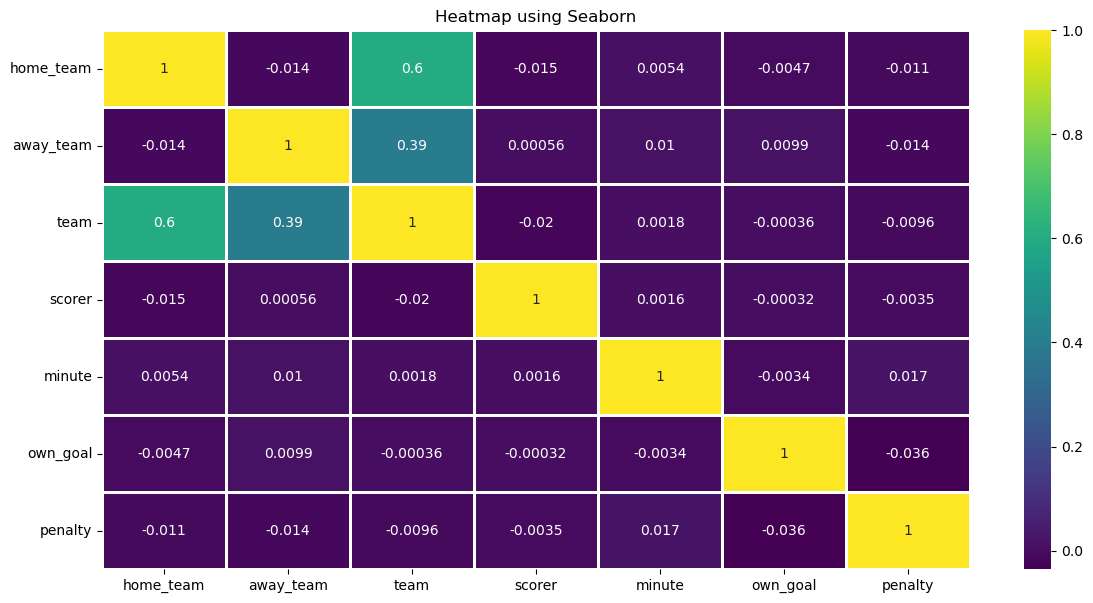

In [209]:
plt.figure(figsize=(14,7))
heatmap=sns.heatmap(fifa_n,linewidth=2,annot=True,cmap=plt.cm.viridis)
plt.title("Heatmap using Seaborn")
plt.show()

# EDA Process

# Outliers

In [210]:
import matplotlib.pyplot as plt
import numpy as np

In [211]:
fifa.dtypes

home_team      int32
away_team      int32
team           int32
scorer         int32
minute       float64
own_goal       int64
penalty        int64
dtype: object

<Axes: >

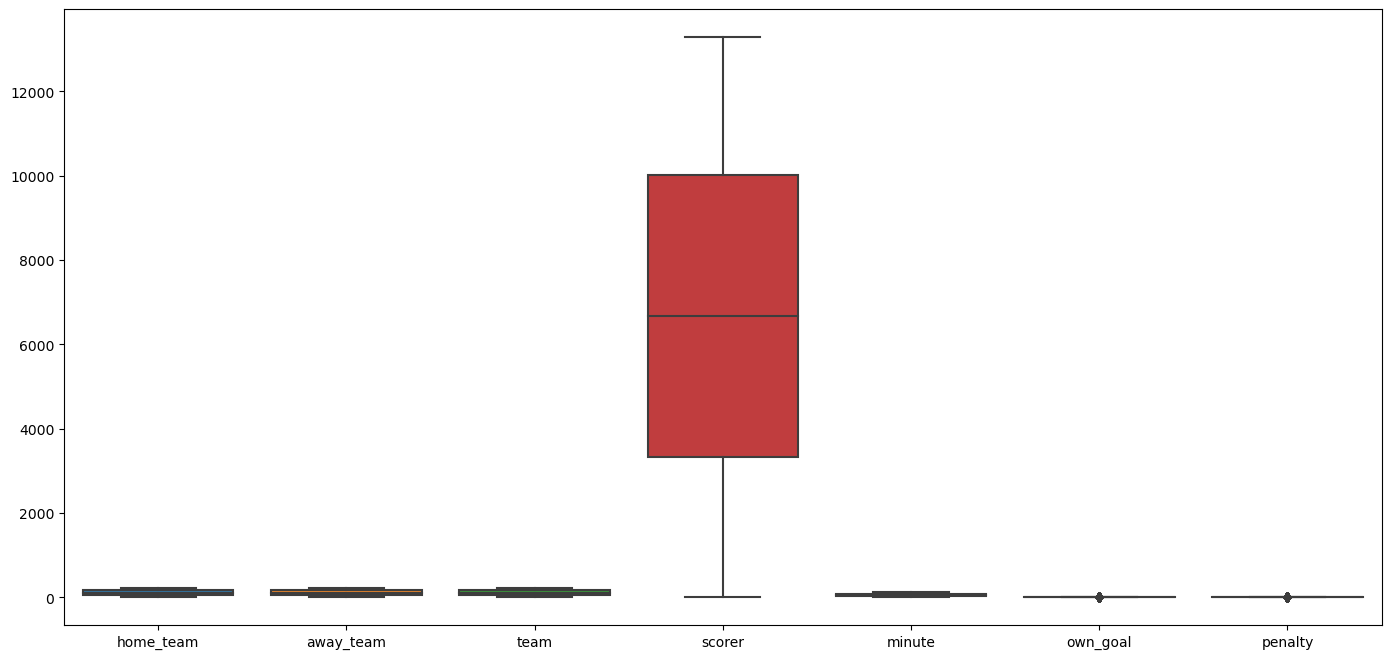

In [212]:
fig=plt.figure(figsize=(17,8))
sns.boxplot(data=fifa)

<Axes: xlabel='scorer', ylabel='Density'>

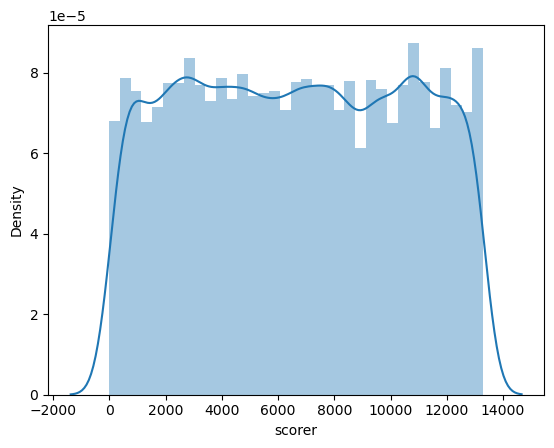

In [213]:
sns.distplot(fifa.scorer) 

In [214]:
fifa.scorer.describe()

count    40750.000000
mean      6664.722896
std       3835.470869
min          0.000000
25%       3323.250000
50%       6678.000000
75%      10010.000000
max      13285.000000
Name: scorer, dtype: float64

Text(0.5, 1.0, 'minute')

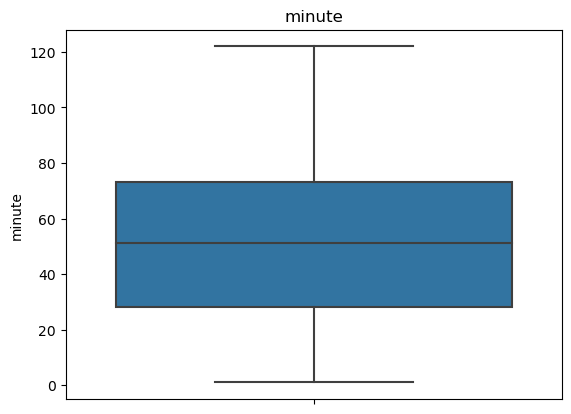

In [215]:
sns.boxplot(data=fifa,y="minute")
plt.title("minute")

In [216]:
#fifa.minut e.value_counts()

In [217]:
#sns.distplot(fifa.minute) 

In [218]:
#fifa.minute.describe()

<Axes: ylabel='minute'>

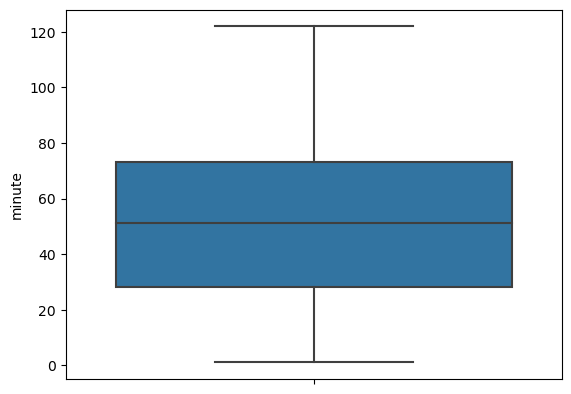

In [219]:
sns.boxplot(data=fifa,y="minute")

# Skewness Treatment

In [220]:
fifa.skew()

home_team    0.071280
away_team   -0.009411
team         0.028810
scorer       0.008981
minute      -0.099492
own_goal     7.333265
penalty      3.501372
dtype: float64

# FEATURE SELECTION

# RFE(Recurssive feture elimination)

In [221]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [222]:
rfe=RFE(dtree,n_features_to_select=5)

In [223]:
rfe.fit(fifa2.iloc[:,:-1],fifa2.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [224]:
rfe.support_

array([ True,  True,  True,  True,  True, False])

In [225]:
f1=pd.DataFrame({"feature":list(rfe.support_),"column":list(fifa2.iloc[:,:-1].columns)})
f1

,feature,column
0,True,home_team
1,True,away_team
2,True,team
3,True,scorer
4,True,minute
5,False,own_goal


In [226]:
df3=fifa2.drop(['own_goal'],axis=1)
df3

,home_team,away_team,team,scorer,minute,penalty
0,40,208,208,6303,44.000000,0
1,40,208,208,5265,55.000000,0
2,40,208,208,5265,70.000000,0
3,40,208,208,6303,75.000000,0
4,8,40,8,481,2.000000,0
...,...,...,...,...,...,...
76129,199,175,175,6777,31.849552,1
76130,173,114,173,6196,59.873823,1
76131,188,107,107,1993,19.561641,1
76132,200,146,200,6342,43.228208,1


In [227]:
df3_x=df3.iloc[:,:-1]
df3_y=df3.iloc[:,-1]

In [228]:
xtr3,xte3,ytr3,yte3=train_test_split(df3_x,df3_y,test_size=0.2,random_state=100)
xtr3.shape,xte3.shape,ytr3.shape,yte3.shape

((60907, 5), (15227, 5), (60907,), (15227,))

# LogisticRegression

In [229]:
lg.fit(xtr3,ytr3)

LogisticRegression()

In [230]:
f_p1=lg.predict(xte3)
#f_p1

In [231]:
f_cf1=confusion_matrix(yte3,f_p1)     #actual and predict
f_cf1  

array([[4008, 3555],
       [3719, 3945]], dtype=int64)

In [232]:
f_ac1=f_cf1.diagonal().sum()/f_cf1.sum()*100
f_ac1

52.229592171800086

In [233]:
print(classification_report(yte3,f_p1))

              precision    recall  f1-score   support

           0       0.52      0.53      0.52      7563
           1       0.53      0.51      0.52      7664

    accuracy                           0.52     15227
   macro avg       0.52      0.52      0.52     15227
weighted avg       0.52      0.52      0.52     15227



In [234]:
Lg_f2=f1_score(yte3,f_p1)
Lg_p2=precision_score(yte3,f_p1)
Lg_r2=recall_score(yte3,f_p1)
print(Lg_f2,Lg_p2,Lg_r2)

0.5203112635188606 0.526 0.5147442588726514


# Random Forest

In [235]:
rf.fit(xtr3,ytr3)

RandomForestClassifier()

In [236]:
rf_fp1=rf.predict(xte3)

Text(0.5, 1.0, 'Confusion Matrix')

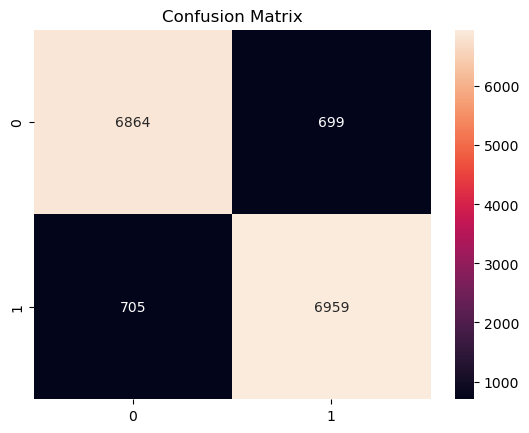

In [237]:
rf_fcf1=confusion_matrix(yte3,rf_fp1)
sns.heatmap(rf_fcf1,annot=True,fmt='d')
plt.title('Confusion Matrix')

In [238]:
rf_fac1=rf_fcf1.diagonal().sum()/rf_fcf1.sum()*100
rf_fac1 

90.77953634990477

In [239]:
print(classification_report(yte3,rf_fp1))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7563
           1       0.91      0.91      0.91      7664

    accuracy                           0.91     15227
   macro avg       0.91      0.91      0.91     15227
weighted avg       0.91      0.91      0.91     15227



In [240]:
rf_f2=f1_score(yte3,rf_fp1)
rf_p2=precision_score(yte3,rf_fp1)
rf_r2=recall_score(yte3,rf_fp1)
print(rf_f2,rf_p2,rf_r2)

0.9083670539094112 0.9087229041525202 0.9080114822546973


# Decision Tree

In [241]:
dt.fit(xtr3,ytr3)

DecisionTreeClassifier()

In [242]:
dt_fp3=dt.predict(xte3)

In [243]:
dt_fcf3=confusion_matrix(yte3,dt_fp3)
dt_fcf3  

array([[6906,  657],
       [ 540, 7124]], dtype=int64)

In [244]:
dt_fac3=dt_fcf3.diagonal().sum()/dt_fcf3.sum()*100
dt_fac3

92.13896368293163

In [245]:
print(classification_report(yte3,dt_fp3))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7563
           1       0.92      0.93      0.92      7664

    accuracy                           0.92     15227
   macro avg       0.92      0.92      0.92     15227
weighted avg       0.92      0.92      0.92     15227



In [246]:
dt_f2=f1_score(yte3,dt_fp3)
dt_p2=precision_score(yte3,dt_fp3)
dt_r2=recall_score(yte3,dt_fp3)
print(dt_f2,dt_p2,dt_r2)

0.9224991906765944 0.9155635522426423 0.9295407098121086


# KNN

In [247]:
knn.fit(xtr3,ytr3)

KNeighborsClassifier()

In [248]:
knn_fp2=knn.predict(xte3)

In [249]:
knn_fcf1=confusion_matrix(yte3,knn_fp2)
knn_fcf1

array([[5540, 2023],
       [ 226, 7438]], dtype=int64)

In [250]:
knn_fac1=knn_fcf1.diagonal().sum()/knn_fcf1.sum()*100
knn_fac1

85.23018322716229

In [251]:
print(classification_report(yte3,knn_fp2))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83      7563
           1       0.79      0.97      0.87      7664

    accuracy                           0.85     15227
   macro avg       0.87      0.85      0.85     15227
weighted avg       0.87      0.85      0.85     15227



In [252]:
knn_f2=f1_score(yte3,knn_fp2)
knn_p2=precision_score(yte3,knn_fp2)
knn_r2=recall_score(yte3,knn_fp2)
print(knn_f2,knn_p2,knn_r2)

0.8686715328467154 0.786174822957404 0.9705114822546973


# Adaptive Boosting

In [253]:
adbo.fit(xtr3,ytr3)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [254]:
adbo_fp1=adbo.predict(xte3)

In [255]:
adbo_fcf1=confusion_matrix(yte3,adbo_fp1)
adbo_fcf1

array([[6940,  623],
       [ 537, 7127]], dtype=int64)

In [256]:
adbo_fac1=adbo_fcf1.diagonal().sum()/adbo_fcf1.sum()*100
adbo_fac1

92.38195310960793

In [257]:
print(classification_report(yte3,adbo_fp1))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7563
           1       0.92      0.93      0.92      7664

    accuracy                           0.92     15227
   macro avg       0.92      0.92      0.92     15227
weighted avg       0.92      0.92      0.92     15227



In [258]:
adbo_f2=f1_score(yte3,adbo_fp1)
adbo_p2=precision_score(yte3,adbo_fp1)
adbo_r2=recall_score(yte3,adbo_fp1)
print(adbo_f2,adbo_p2,adbo_r2)


0.9247437394576359 0.9196129032258065 0.9299321503131524


# XGB(XGBOOST)

In [259]:
xgb.fit(xtr3,ytr3)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [260]:
xgb_fp1=xgb.predict(xte3)

In [261]:
xgb_fcf1=confusion_matrix(yte3,xgb_fp1)
xgb_fcf1

array([[7509,   54],
       [ 617, 7047]], dtype=int64)

In [262]:
xgb_fac1=xgb_fcf1.diagonal().sum()/xgb_fcf1.sum()*100
xgb_fac1

95.59335391081632

In [263]:
print(classification_report(yte3,xgb_fp1))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7563
           1       0.99      0.92      0.95      7664

    accuracy                           0.96     15227
   macro avg       0.96      0.96      0.96     15227
weighted avg       0.96      0.96      0.96     15227



In [264]:
xgb_f2=f1_score(yte3,xgb_fp1)
xgb_p2=precision_score(yte3,xgb_fp1)
xgb_r2=recall_score(yte3,xgb_fp1)
print(xgb_f2,xgb_p2,xgb_r2)

0.9545546901456148 0.9923954372623575 0.9194937369519833


# Navie Bayes

In [265]:
nb.fit(xtr3,ytr3)

MultinomialNB()

In [266]:
nb_fp1=nb.predict(xte3)
nb_fp1

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [267]:
nb_fcf1=confusion_matrix(yte3,nb_fp1)
nb_fcf1

array([[3800, 3763],
       [3705, 3959]], dtype=int64)

In [268]:
nb_facc1=nb_fcf1.diagonal().sum()/nb_fcf1.sum()*100
nb_facc1

50.95553950220004

In [269]:
print(classification_report(yte3,nb_fp1)) 

              precision    recall  f1-score   support

           0       0.51      0.50      0.50      7563
           1       0.51      0.52      0.51      7664

    accuracy                           0.51     15227
   macro avg       0.51      0.51      0.51     15227
weighted avg       0.51      0.51      0.51     15227



In [270]:
nb_f2=f1_score(yte3,nb_fp1)
nb_p2=precision_score(yte3,nb_fp1)
nb_r2=recall_score(yte3,nb_fp1)
print(nb_f2,nb_p2,nb_r2)

0.5146236838684518 0.5126910126910127 0.516570981210856


In [271]:
f1=["Logistic","RF","DT","KNN","ADB","XGB","NB"]
f2=[f_ac1,rf_fac1,dt_fac3,knn_fac1,adbo_fac1,xgb_fac1,nb_facc1]
f3=[Lg_p2,rf_p2,dt_p2,knn_p2,adbo_p2,xgb_p2,nb_p2]
f4=[Lg_r2,rf_r2,dt_r2,knn_r2,adbo_r2,xgb_r2,nb_r2]
f5=[Lg_f2,rf_f2,dt_f2,knn_f2,adbo_f2,xgb_f2,nb_f2]

In [272]:
final_f1=pd.DataFrame({"Model":f1,"Accuracy":f2,"Precision":f3,"recall":f4,"f1_score":f5})
final_f1

,Model,Accuracy,Precision,recall,f1_score
0,Logistic,52.229592,0.526000,0.514744,0.520311
1,RF,90.779536,0.908723,0.908011,0.908367
2,DT,92.138964,0.915564,0.929541,0.922499
3,KNN,85.230183,0.786175,0.970511,0.868672
4,ADB,92.381953,0.919613,0.929932,0.924744
5,XGB,95.593354,0.992395,0.919494,0.954555
6,NB,50.955540,0.512691,0.516571,0.514624


In [273]:
#Conclusion:After performing the feature selection process, Accuracy not increased that much
#in the model and increased TP compared to model 2, we can also conclude by using PRC curve 

In [274]:
prob=rf.predict_proba(xte3)
#prob

In [275]:
df=pd.DataFrame(prob)
df

,0,1
0,0.51,0.49
1,0.57,0.43
2,0.92,0.08
3,0.79,0.21
4,0.78,0.22
...,...,...
15222,0.70,0.30
15223,0.83,0.17
15224,0.65,0.35
15225,0.31,0.69


In [276]:
#pRC curve 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [277]:
precision,recall,threshold=precision_recall_curve(yte3,df.iloc[:,1])

In [278]:
#precision         

In [279]:
#recall

In [280]:
#threshold 

Text(0.5, 1.0, 'PRC-CURVE')

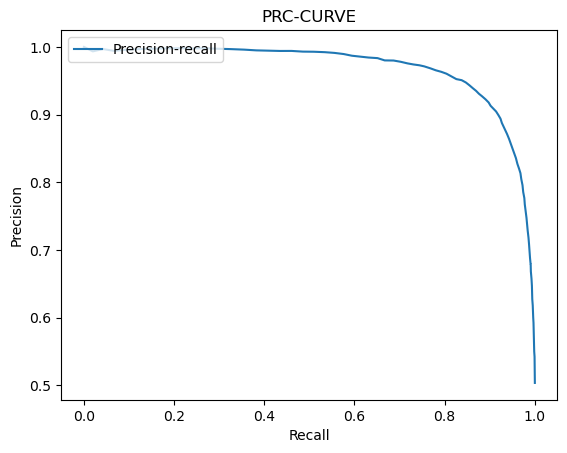

In [281]:
plt.plot(recall,precision,label="Precision-recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("PRC-CURVE")